Name: Liangfan Pang | CWID: 10453333

## 1. Plot the data

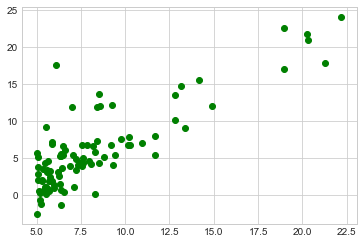

In [6]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('seaborn-whitegrid') 
data = np.loadtxt("data2.txt",delimiter=",")
x = data[:, 0]
y = data[:, 1]
plt.plot(x,y,'go')

-----

## 2. Find the coefficients using Normal Equation

In [2]:
import numpy as np
def normalequation(X, y):
    X_b = np.c_[np.ones(len(data)), X]
    sigma = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
    return sigma

sigma = normalequation(data[:, 0], data[:, 1])
print(sigma)

[-3.89578088  1.19303364]


----

## 3. Gradient Descent

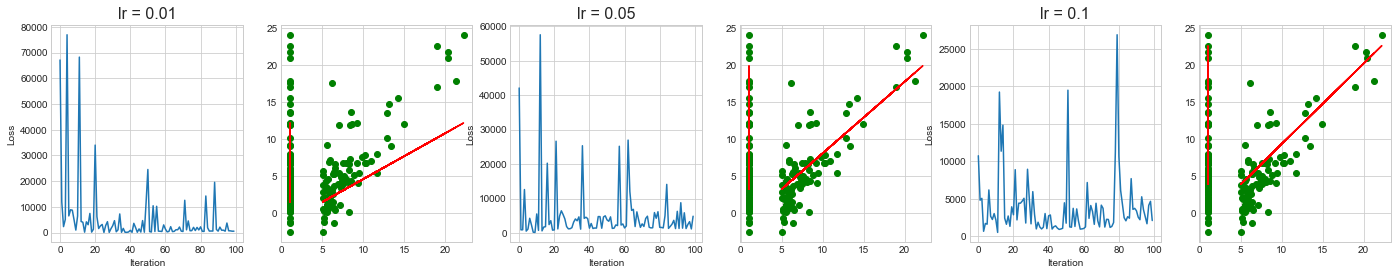

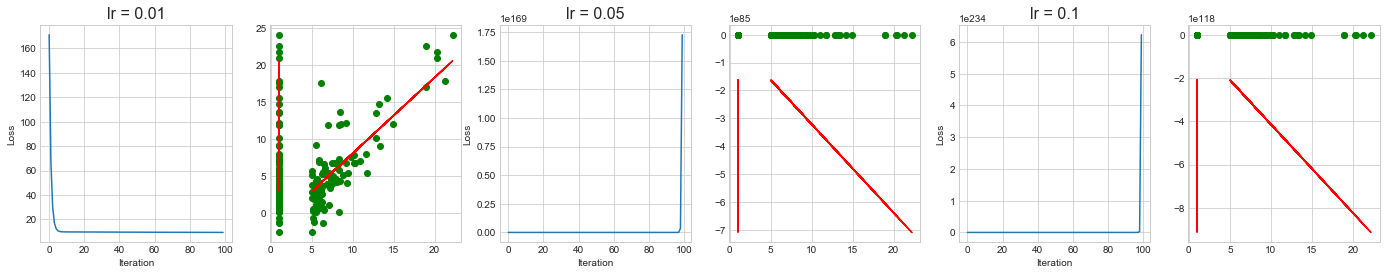

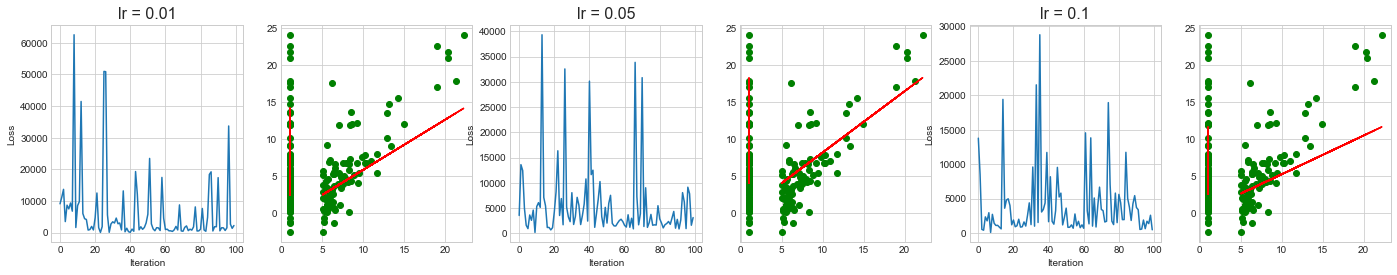

In [5]:
m=100
eps=1e-2
n_iterations = 100
data = np.loadtxt("data2.txt",delimiter=",")
X = data[:,0]
y = data[:,[1]]
X_b = np.c_[np.ones(len(data)), X]

    
def vis_stats(all_iter_list, all_cost_list,lr):
    plt.plot(all_iter_list, all_cost_list)
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.title('lr = '+format(lr), fontsize = 16)
def vis_predict(theta,x,y):
    plt.plot(x,y,'go')
    plt.plot(x,x.dot(theta),'r-')
#     plt.title('theta= {:.2f}*1e-5,{:.2f}*1e-5'.format(float(theta[0])*1e5,float(theta[1])*1e5 ), fontsize = 10)
    
def cost_cal(x,theta,y,reg):
    W=theta[0]
    return np.sum(np.square(X_b.dot(theta)-y))/x.shape[0] +0.5 * reg * (np.sum(W*W))
def get_gradient(x,theta,y,reg):
    data_grad=2/m*x.T.dot(x.dot(theta)-y)
    data_grad[0]+=reg * theta[0]
    return data_grad
def gradient_descent(theta0, lr,batch_gd=True,reg=0):

    iters=0
    theta=theta0
    cost_func=cost_cal(X_b,theta,y,reg)
    all_cost_list=[]
    all_iter_list=[]
    while iters<n_iterations and cost_func>eps:
        y_predict = X_b.dot(theta)
        if batch_gd:
            X_used=X_b
            y_used=y
        else:
            random_idx=np.random.choice(X_b.shape[0],1)
            X_used=X_b[random_idx]
            y_used=y[random_idx]
        cost_func=cost_cal(X_used,theta,y_used,reg)
#         style = 'g-' if iters > 0 else 'r-'
#         print(iters,cost_func)
        all_iter_list.append(iters)
        all_cost_list.append(cost_func)
        gradients = get_gradient(X_used,theta,y_used,reg)
        theta = theta - lr*gradients
        iters+=1
#     plt.xlabel('$x$', fontsize=20)
#     plt.axis([0,2,0,25])
    return all_iter_list, all_cost_list,theta

np.random.seed(97)
theta0 = np.random.randn(2,1)

# stochastic gd
plt.figure(figsize=(24,4))
plt.subplot(161)
all_iter_list, all_cost_list,theta=gradient_descent(theta0, 0.01,batch_gd=False)
vis_stats(all_iter_list, all_cost_list,0.01)
plt.subplot(162)
vis_predict(theta,X_b,y)

plt.subplot(163)
all_iter_list, all_cost_list,theta=gradient_descent(theta0, 0.05,batch_gd=False)
vis_stats(all_iter_list, all_cost_list,0.05)
plt.subplot(164)
vis_predict(theta,X_b,y)

plt.subplot(165)
all_iter_list, all_cost_list,theta=gradient_descent(theta0, 0.1,batch_gd=False)
vis_stats(all_iter_list, all_cost_list,0.1)
plt.subplot(166)
vis_predict(theta,X_b,y)

plt.show()  

# # batch gd
plt.figure(figsize=(24,4))
plt.subplot(161)
all_iter_list, all_cost_list,theta=gradient_descent(theta0, 0.01,batch_gd=True)
vis_stats(all_iter_list, all_cost_list,0.01)
plt.subplot(162)
vis_predict(theta,X_b,y)

plt.subplot(163)
all_iter_list, all_cost_list,theta=gradient_descent(theta0, 0.05,batch_gd=True)
vis_stats(all_iter_list, all_cost_list,0.05)
plt.subplot(164)
vis_predict(theta,X_b,y)

plt.subplot(165)
all_iter_list, all_cost_list,theta=gradient_descent(theta0, 0.1,batch_gd=True)
vis_stats(all_iter_list, all_cost_list,0.1)
plt.subplot(166)
vis_predict(theta,X_b,y)

plt.show()


# # batch gd, if overfitting appear, let reg >0, here we choose 0.001
plt.figure(figsize=(24,4))
plt.subplot(161)
all_iter_list, all_cost_list,theta=gradient_descent(theta0, 0.01,batch_gd=False,reg=0.5)
vis_stats(all_iter_list, all_cost_list,0.01)
plt.subplot(162)
vis_predict(theta,X_b,y)

plt.subplot(163)
all_iter_list, all_cost_list,theta=gradient_descent(theta0, 0.05,batch_gd=False,reg=0.5)
vis_stats(all_iter_list, all_cost_list,0.05)
plt.subplot(164)
vis_predict(theta,X_b,y)

plt.subplot(165)
all_iter_list, all_cost_list,theta=gradient_descent(theta0, 0.1,batch_gd=False,reg=0.5)
vis_stats(all_iter_list, all_cost_list,0.1)
plt.subplot(166)
vis_predict(theta,X_b,y)

plt.show()

Plots on the first line use the stochastic gradient descent, and plots on the second line use the batch gradient descent, and plots on the third line use the stochastic gradient descent adding a regulation.

-----

a) A given number of iterations: 1000

b) The stochastic mode is more accurate. But in general, the batch gradient descent has more stable accuracy than stochastic gradient descent, and the stochastic gradient descent always gets result faster.

c) Yes, there is an overfitting and I fixed it by adding a regulation. It shows on the last six plots.

d) The best learning rate should be 0.01.